# Sparse Data Fitting and Inferring

In this experience, we need to fit a function $(y_1, y_2) = f(x)$ with one input and two outputs given the oberserved data samples.
However, the dataset is defective on that one of the output $y_1$ only distributes on a few sparse discrete values (which means that the $x$ are sampled on a few distributed subspaces).

The target of this experience is to find a model that can reasonablly fill the gape in the dataset.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
def draw_3Dfunc(func_in, x_min=-2, x_max=10, vmin=-1.5, vmax=1.5):
    n_sample = 100
    x1v, x2v = np.meshgrid(np.linspace(x_min, x_max, n_sample), np.linspace(x_min, x_max, n_sample))
    mesh_shape = x1v.shape
    print("mesh_shape = %s" % str(mesh_shape))
    X1 = x1v.reshape([-1,1])
    X2 = x2v.reshape([-1,1])
    y = func_in(np.hstack((X1, X2)))
    yv = y.reshape(*mesh_shape)
    print("yv.shape = %s" % str(yv.shape))
    c = plt.pcolormesh(x1v, x2v, yv, shading="nearest", vmin=vmin, vmax=vmax)
    plt.axis('equal')
    # c = plt.imshow(yv)
    plt.colorbar(c)

## Data Generation

In [74]:
def func_0(X, x_min=-0.6, x_max=0.6, period=1.0):
    X1 = X[...,0:1]
    X2 = X[...,1:2]
#     X_diff = X1 - X2
    X_diff = X1
    # X_diff = np.clip(X_diff, x_min, x_max)
    # y = np.sin( (2.0*np.pi/period)*X_diff + np.pi/3) # Period for X_diff: period
    y = np.sin( (0.2*np.pi/period)*X_diff + np.pi/3) # Period for X_diff: period
    # return np.where( (np.abs(X_diff) <= 1.0), y, 0.0)
    return y

In [75]:
# A = [ np.hstack( [np.full((5,1), _i), np.arange(5).reshape((5,1))] ) for _i in range(3)]
# B = np.vstack(A)
# print(A)
# print(B)
print(list(range(0,10,2)))

[0, 2, 4, 6, 8]


In [76]:
np.random.seed(42)
m_part = 50 # sample per x1 value

# Input 
# The data will be shuffled next, so don't worry about the randomness now
# x_1: [0, 2, 4, 6, 8] <-- range(0, 10, 2)
# x_2: randomly sampled in [0, 8] region
X_data_list = [ np.hstack( [ np.full((m_part,1), x1), np.random.rand(m_part,1)*8.0] ) for x1 in range(0, 10, 2)]
X_data = np.vstack(X_data_list)


# Data length
m = X_data.shape[0]
print("m = %d" % m)

# Output
y_data_pure = func_0(X_data) # Period for X_diff: 2.0

# Label (+noise)
n_stddev = 0.2
y_data = y_data_pure + np.random.randn(m, 1) * n_stddev
print("X_data.shape = %s" % str(X_data.shape))
print("y_data.shape = %s" % str(y_data.shape))

m = 250
X_data.shape = (250, 2)
y_data.shape = (250, 1)


In [77]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Data Visualization

mesh_shape = (100, 100)
yv.shape = (100, 100)


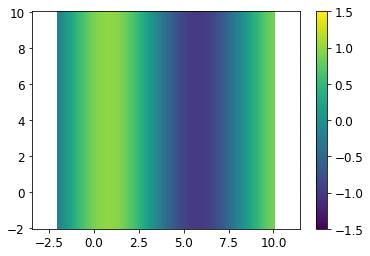

In [78]:
# x1v, x2v = np.meshgrid(np.linspace(-5, 10, 100), np.linspace(-5, 10, 100))
# yv = func_0(x1v, x2v)
# c = plt.pcolormesh(x1v, x2v, yv, shading="nearest")
# plt.axis('equal')
# # c = plt.imshow(yv)
# plt.colorbar(c)

draw_3Dfunc(func_0)

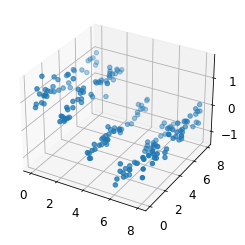

In [79]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train[:,0], marker='o')

In [81]:
import plotly.express as px

fig = px.scatter_3d(x=X_train[:,0], y=X_train[:,1], z=y_train[:,0])
fig.show()

# Naive Model

In [82]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9)
model.compile(loss="mean_squared_error", optimizer=optimizer)

/home/benson516/ml/my_env/lib/python3.6/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [83]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
7/7 [==============================] - 2s 111ms/step - loss: 1.9175 - val_loss: 0.4607
Epoch 2/100
7/7 [==============================] - 0s 40ms/step - loss: 0.4134 - val_loss: 0.3392
Epoch 3/100
7/7 [==============================] - 0s 38ms/step - loss: 0.3093 - val_loss: 0.2665
Epoch 4/100
7/7 [==============================] - 0s 43ms/step - loss: 0.2778 - val_loss: 0.2615
Epoch 5/100
7/7 [==============================] - 0s 46ms/step - loss: 0.2792 - val_loss: 0.2448
Epoch 6/100
7/7 [==============================] - 0s 42ms/step - loss: 0.2670 - val_loss: 0.2490
Epoch 7/100
7/7 [==============================] - 0s 43ms/step - loss: 0.2345 - val_loss: 0.2173
Epoch 8/100
7/7 [==============================] - 0s 41ms/step - loss: 0.2256 - val_loss: 0.2184
Epoch 9/100
7/7 [==============================] - 0s 41ms/step - loss: 0.2180 - val_loss: 0.2103
Epoch 10/100
7/7 [==============================] - 0s 32ms/step - loss: 0.2130 - val_loss: 0.2178
Epoch 11/100
7/7 [

7/7 [==============================] - 0s 21ms/step - loss: 0.0926 - val_loss: 0.0978
Epoch 84/100
7/7 [==============================] - 0s 21ms/step - loss: 0.0843 - val_loss: 0.0934
Epoch 85/100
7/7 [==============================] - 0s 33ms/step - loss: 0.0781 - val_loss: 0.0878
Epoch 86/100
7/7 [==============================] - 0s 29ms/step - loss: 0.0787 - val_loss: 0.0836
Epoch 87/100
7/7 [==============================] - 0s 20ms/step - loss: 0.0805 - val_loss: 0.0882
Epoch 88/100
7/7 [==============================] - 0s 24ms/step - loss: 0.0765 - val_loss: 0.0862
Epoch 89/100
7/7 [==============================] - 0s 18ms/step - loss: 0.0773 - val_loss: 0.0806
Epoch 90/100
7/7 [==============================] - 0s 27ms/step - loss: 0.0759 - val_loss: 0.0839
Epoch 91/100
7/7 [==============================] - 0s 30ms/step - loss: 0.0741 - val_loss: 0.0851
Epoch 92/100
7/7 [==============================] - 0s 23ms/step - loss: 0.0791 - val_loss: 0.0775
Epoch 93/100
7/7 [=====

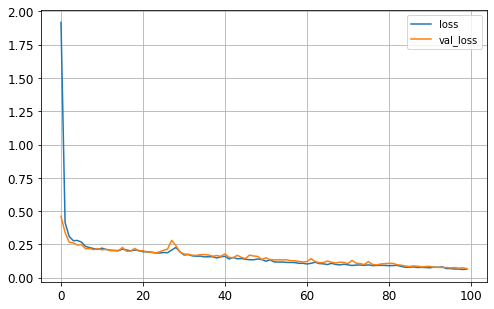

In [84]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 1)
plt.show()

mesh_shape = (100, 100)
yv.shape = (100, 100)


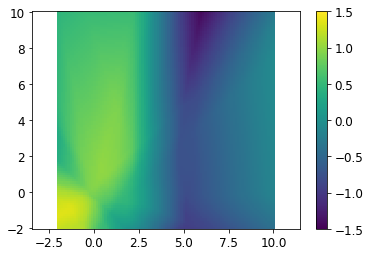

In [85]:
draw_3Dfunc(model.predict)

mesh_shape = (100, 100)
y1.shape = (10000, 1)
y2.shape = (10000, 1)
yv.shape = (100, 100)


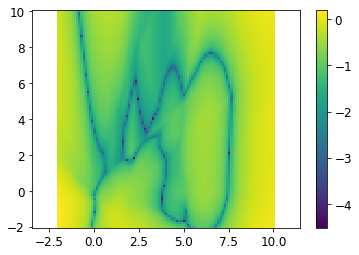

In [86]:
def log_abs_err_func(X):
    y1 = model.predict(X)
    y2 = func_0(X)
    print("y1.shape = %s" % str(y1.shape))
    print("y2.shape = %s" % str(y2.shape))
    return np.log(np.abs(y1 - y2)) / np.log(10.0)

draw_3Dfunc(log_abs_err_func, vmin=None, vmax=None)

# Simulated CNN Feature Map (1-D, grids)

In [87]:
class num2gridCh(keras.layers.Layer):
    def __init__(self, units, x_min=-10, x_max=10, sigma=1.0, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.x_min = x_min
        self.x_max = x_max
        self.sigma = sigma
        self.sigma2 = self.sigma**2
        self.activation = keras.activations.get(activation)
        
    def build(self, batch_input_shape):
        #
        self.x_grid = np.linspace(self.x_min, self.x_max, self.units, endpoint=True).reshape((-1,1))
#         print("self.x_grid.shape = %s" % str(self.x_grid.shape))
        #
        super().build(batch_input_shape) # must be at the end
        
    def call(self, X):
        '''
        Input shape:  (batch, X_chanel)
        Output shape: (batch, grid_unit, X_channel) <-- grid_unit is the dimension for conv1D to slide
        
        self.x_grid shape: (grid_unit,1)
        '''
        X_shape = X.shape
        X_span = tf.reshape(X, [-1,1,X_shape[-1]] )
        gauss_grid = tf.exp( -(self.x_grid - X_span)**2 / (2.0*self.sigma2) )
        return self.activation(gauss_grid)
    
    def compute_output_shape(self, batch_input_shape):
        return tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.units] + batch_input_shape.as_list()[-1:])
    
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, 
                "units": self.units,
                "x_min": self.x_min,
                "x_max": self.x_max,
                "sigma": self.sigma,
                "activation": keras.activations.serialize(self.activation)}

Examine the shape

In [88]:
input_shape = (100, 2)
x = tf.random.normal(input_shape)
y = num2gridCh(50,x_min=-10, x_max=10, sigma=3.0, input_shape=input_shape[1:])(x)
y.shape

TensorShape([100, 50, 2])

Build the model

In [89]:
model = keras.models.Sequential([
    num2gridCh(50,x_min=-10, x_max=10, sigma=0.2, input_shape=X_train.shape[1:]),
    keras.layers.Flatten(),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9)
model.compile(loss="mean_squared_error", optimizer=optimizer)

/home/benson516/ml/my_env/lib/python3.6/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [90]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
7/7 [==============================] - 1s 61ms/step - loss: 0.5322 - val_loss: 0.5557
Epoch 2/100
7/7 [==============================] - 0s 28ms/step - loss: 0.4793 - val_loss: 0.4921
Epoch 3/100
7/7 [==============================] - 0s 45ms/step - loss: 0.4132 - val_loss: 0.4211
Epoch 4/100
7/7 [==============================] - 0s 29ms/step - loss: 0.3396 - val_loss: 0.3237
Epoch 5/100
7/7 [==============================] - 0s 27ms/step - loss: 0.2444 - val_loss: 0.2044
Epoch 6/100
7/7 [==============================] - 0s 26ms/step - loss: 0.1348 - val_loss: 0.0971
Epoch 7/100
7/7 [==============================] - 0s 36ms/step - loss: 0.0628 - val_loss: 0.0620
Epoch 8/100
7/7 [==============================] - 0s 39ms/step - loss: 0.0494 - val_loss: 0.0562
Epoch 9/100
7/7 [==============================] - 0s 38ms/step - loss: 0.0508 - val_loss: 0.0577
Epoch 10/100
7/7 [==============================] - 0s 28ms/step - loss: 0.0451 - val_loss: 0.0551
Epoch 11/100
7/7 [=

7/7 [==============================] - 0s 36ms/step - loss: 0.0238 - val_loss: 0.0615
Epoch 84/100
7/7 [==============================] - 0s 38ms/step - loss: 0.0234 - val_loss: 0.0594
Epoch 85/100
7/7 [==============================] - 0s 59ms/step - loss: 0.0239 - val_loss: 0.0621
Epoch 86/100
7/7 [==============================] - 0s 52ms/step - loss: 0.0235 - val_loss: 0.0616
Epoch 87/100
7/7 [==============================] - 0s 63ms/step - loss: 0.0242 - val_loss: 0.0597
Epoch 88/100
7/7 [==============================] - 0s 77ms/step - loss: 0.0235 - val_loss: 0.0622
Epoch 89/100
7/7 [==============================] - 0s 64ms/step - loss: 0.0233 - val_loss: 0.0606
Epoch 90/100
7/7 [==============================] - 0s 60ms/step - loss: 0.0233 - val_loss: 0.0607
Epoch 91/100
7/7 [==============================] - 0s 71ms/step - loss: 0.0232 - val_loss: 0.0631
Epoch 92/100
7/7 [==============================] - 0s 68ms/step - loss: 0.0231 - val_loss: 0.0625
Epoch 93/100
7/7 [=====

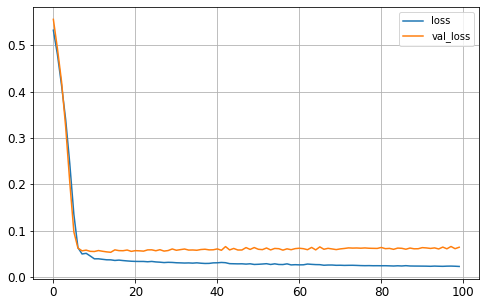

In [91]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 1)
plt.show()

mesh_shape = (100, 100)
yv.shape = (100, 100)


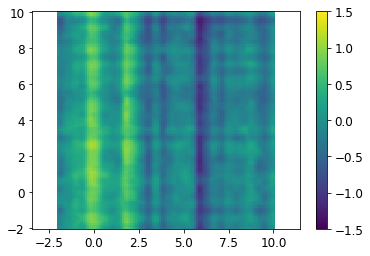

In [92]:
draw_3Dfunc(model.predict)